## EX04

#### 📥 1. Импорт библиотек и подключение к базе

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Подключение к базе данных
conn = sqlite3.connect("../data/checking-logs.sqlite")

# Загрузка только данных пользователей (без админов)
query = """
SELECT timestamp
FROM checker
WHERE uid NOT LIKE 'admin%'
"""
df = pd.read_sql(query, conn)

#### 🕒 2. Предобработка времени

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday

# Определение типа дня
df['day_type'] = df['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

#### 📊 3. Создание списков значений по часам

In [8]:
working_hours = df[df['day_type'] == 'working_day']['hour'].tolist()
weekend_hours = df[df['day_type'] == 'weekend']['hour'].tolist()

#### 🖼️ 4. Построение гистограммы

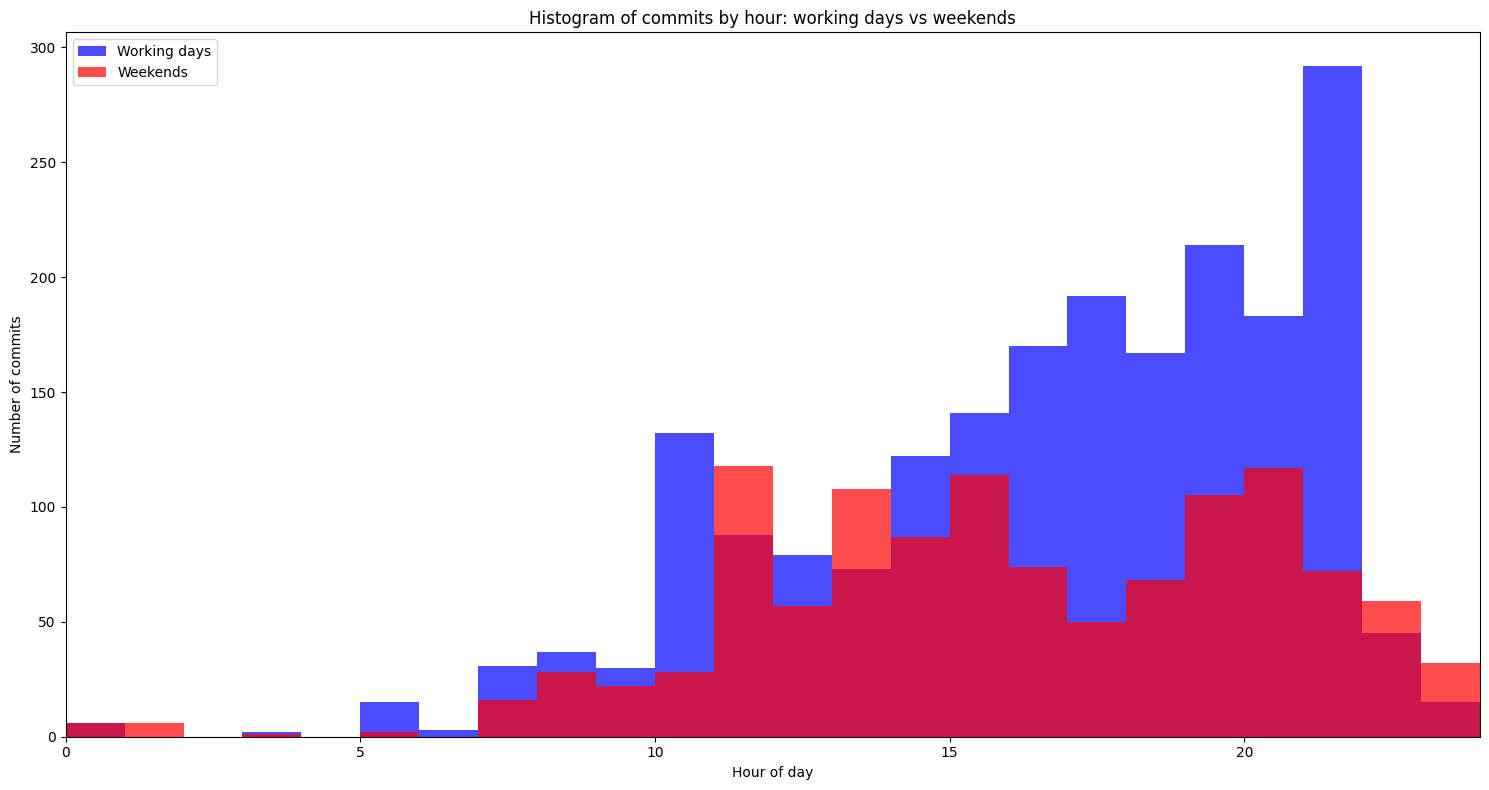

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
bins = list(range(25))

plt.hist(working_hours, bins=bins, alpha=0.7, color='blue', label='Working days', align='left', width=1)
plt.hist(weekend_hours, bins=bins, alpha=0.7, color='red', label='Weekends', align='left', width=1)

ax = plt.gca()

tick_positions = [x - 0.5 for x in range(0, 24, 5)]       # сдвигаем влево (по левым границам)
tick_labels = [x for x in range(0, 24, 5)]       # подписи на -1

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.xlim(-0.5, 23.5)
plt.xlabel("Hour of day")
plt.ylabel("Number of commits")
plt.title("Histogram of commits by hour: working days vs weekends")
plt.legend(loc='upper left')
plt.grid(False)

plt.tight_layout()
plt.show()

#### ✅ Добавим анализ разницы по часам

In [10]:
import IPython.display as display

# Считаем количество коммитов по каждому часу отдельно для working_day и weekend
hourly_counts = df.groupby(['day_type', 'hour']).size().unstack('day_type').fillna(0)

# Вычисляем разницу: weekend - working_day
hourly_counts['diff'] = hourly_counts['weekend'] - hourly_counts['working_day']

# Отбираем только те часы, где выходные > рабочие
positive_diff = hourly_counts[hourly_counts['diff'] > 0]

# Получаем топ-4 часа с наибольшей разницей в пользу выходных
top4_hours = positive_diff.sort_values('diff', ascending=False).head(4).index.tolist()

# Создаём текст Markdown
markdown_text = "### Есть ли часы, когда общее количество коммитов было больше в выходные, чем в рабочие дни?\n\n"
markdown_text += "Да. Топ-4 часа с наибольшим количеством коммитов в выходные по сравнению с рабочими днями:\n\n"
for hour in sorted(top4_hours):
    markdown_text += f"- {hour}:00\n"

# Показываем как markdown
display.display(display.Markdown(markdown_text))

### Есть ли часы, когда общее количество коммитов было больше в выходные, чем в рабочие дни?

Да. Топ-4 часа с наибольшим количеством коммитов в выходные по сравнению с рабочими днями:

- 11:00
- 13:00
- 22:00
- 23:00
